In [2055]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as s
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from scipy.stats import shapiro
from sklearn.preprocessing import LabelEncoder 

In [2056]:
#Importing ModelsDao functions
%run "../../ModelsDao/ModelsGeneration.py"

In [2057]:
loan_dataset = pd.read_csv("../Dataset/LoanDataset.csv")

# 1.) Exploratory Data Analysis

In [2058]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [2059]:
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [2060]:
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [2061]:
loan_dataset.shape

(614, 13)

In [2062]:
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## 2.a) Explore Continuous Features

In [2063]:
cont_features = ['ApplicantIncome','CoapplicantIncome','LoanAmount']

In [2064]:
loan_dataset_cont = loan_dataset.loc[:,cont_features]

In [2065]:
loan_dataset_cont.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,5849,0.0,NaN
1,4583,1508.0,128.0
2,3000,0.0,66.0
3,2583,2358.0,120.0
4,6000,0.0,141.0


In [2066]:
loan_dataset_cont.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


<AxesSubplot:>

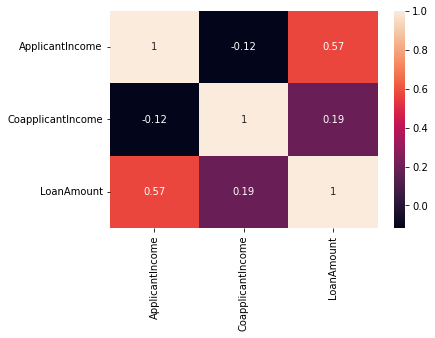

In [2067]:
sns.heatmap(loan_dataset_cont.corr(),annot=True)

In [2068]:
loan_dataset_cont.isnull().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
dtype: int64

C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


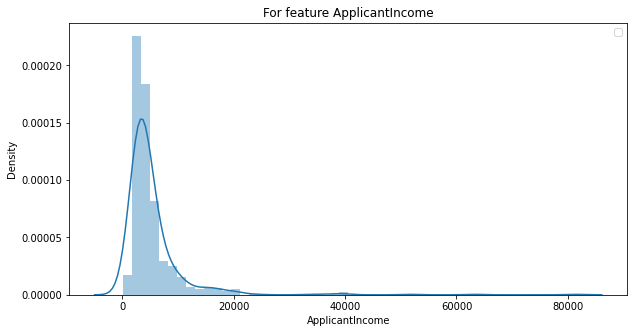

C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


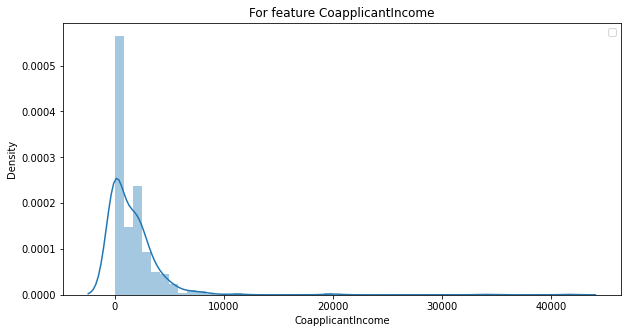

C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


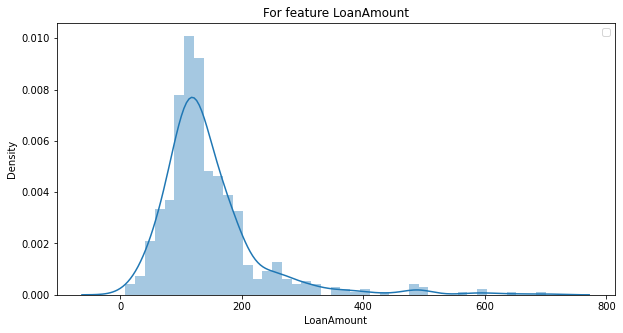

In [2069]:
for feature in cont_features:
  plot_features(loan_dataset_cont,feature) #our own method


In [2070]:
loan_status_dict = {'N':0,'Y':1}
loan_dataset_cont['Loan_Status'] = loan_dataset['Loan_Status'].map(loan_status_dict)

#### 0 --> No
#### 1 --> Yes

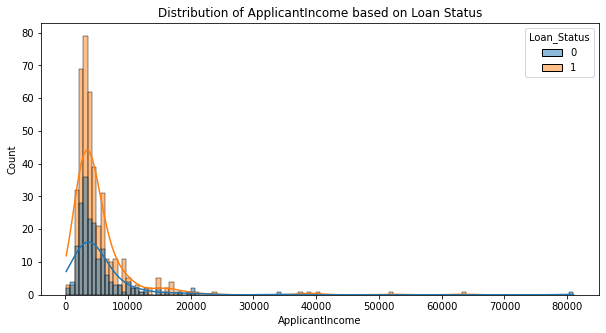

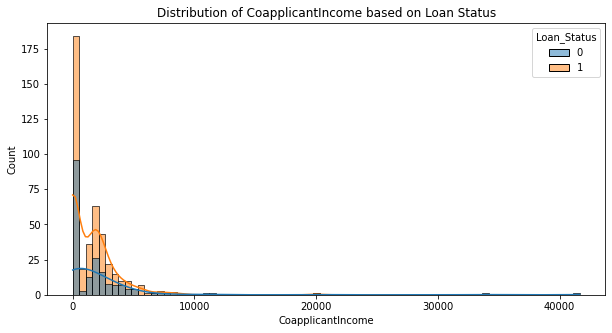

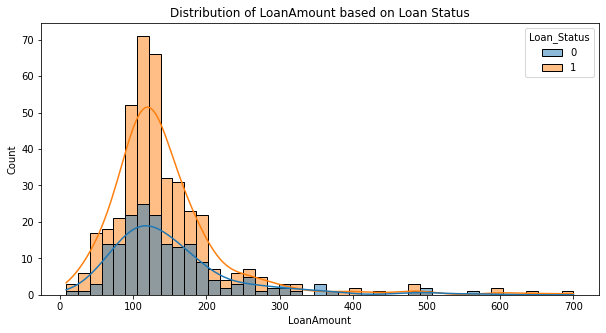

In [2071]:
for feature in cont_features:
  plt.figure(figsize=(10,5))
  plt.title("Distribution of {} based on Loan Status".format(feature))
  sns.histplot(data = loan_dataset_cont,x=feature,kde=True,hue='Loan_Status')
  plt.show()

In [2072]:
#Checking whether the features are gaussian distributed or not
def check_is_gaussian(feature):
  stats , p = shapiro(loan_dataset_cont[feature])

  if p > .05:
    print("{} : is Gaussian".format(feature))
  else:
    print("{}: not Gaussian".format(feature))

  print(stats)

In [2073]:
for feature in cont_features:
  check_is_gaussian(feature)

ApplicantIncome: not Gaussian
0.47126346826553345
CoapplicantIncome: not Gaussian
0.4815017580986023
LoanAmount : is Gaussian
nan


In [2074]:
def feature_target_distribution(feature):
  print("For the feature {}".format(feature))
  no_count = loan_dataset_cont[feature][loan_dataset_cont['Loan_Status']==0].count()
  yes_count = loan_dataset_cont[feature][loan_dataset_cont['Loan_Status']==1].count()
  print("Total entries: ",loan_dataset_cont[feature].shape[0] )
  print("No Count: ",no_count)
  print("Yes Count: ",yes_count)
  print("Yes/No Ratio: ",yes_count/no_count)
  print()

In [2075]:
for feature in cont_features:
  feature_target_distribution(feature)

For the feature ApplicantIncome
Total entries:  614
No Count:  192
Yes Count:  422
Yes/No Ratio:  2.1979166666666665

For the feature CoapplicantIncome
Total entries:  614
No Count:  192
Yes Count:  422
Yes/No Ratio:  2.1979166666666665

For the feature LoanAmount
Total entries:  614
No Count:  181
Yes Count:  411
Yes/No Ratio:  2.270718232044199



In [2076]:
## Finding the outliers in the features
for feature in cont_features:
  find_outliers(loan_dataset_cont,feature)

For the feature ApplicantIncome, there are 0 outliers
For the feature CoapplicantIncome, there are 0 outliers
For the feature LoanAmount, there are 0 outliers


### Conclusion from exploration of continuous features
#### 1.) There is certain skewness in ApplicantIncome and CoApplicantIncome features.
#### 2.) There are 22 null values in LoanAmount feature
#### 3.) ApplicantIncome and CoApplicantIncome features are not gaussian distributed while LoanAmmount is Gausian Distributed.
#### 4.) For all the features the ratio of YES/No for Loan_Status is around 2.
#### 5.) There are no outliers.

## 2.b) Explore Categorical features

In [2077]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [2078]:
cat_features = loan_dataset.columns.drop(cont_features)

In [2079]:
cat_features

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status'],
      dtype='object')

In [2080]:
cat_features = cat_features.drop(['Loan_ID','Loan_Status'])

In [2081]:
loan_dataset_cat = loan_dataset.loc[:,cat_features]

In [2082]:
loan_dataset_cat.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,360.0,1.0,Urban
4,Male,No,0,Graduate,No,360.0,1.0,Urban


In [2083]:
loan_dataset_cat.describe()

C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


,Loan_Amount_Term,Credit_History
count,600.00000,564.000000
mean,342.00000,0.842199
std,65.12041,0.364878
min,12.00000,0.000000
25%,360.00000,1.000000
50%,360.00000,1.000000
75%,360.00000,1.000000
max,480.00000,1.000000


In [2084]:
loan_dataset_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            601 non-null    object 
 1   Married           611 non-null    object 
 2   Dependents        599 non-null    object 
 3   Education         614 non-null    object 
 4   Self_Employed     582 non-null    object 
 5   Loan_Amount_Term  600 non-null    float64
 6   Credit_History    564 non-null    float64
 7   Property_Area     614 non-null    object 
dtypes: float64(2), object(6)
memory usage: 38.5+ KB


In [2085]:
def see_cats_per_feature(feature):
  print("For {}".format(feature))
  print(loan_dataset_cat[feature].value_counts())
  print()

In [2086]:
for feature in cat_features:
  see_cats_per_feature(feature)

For Gender
Male      489
Female    112
Name: Gender, dtype: int64

For Married
Yes    398
No     213
Name: Married, dtype: int64

For Dependents
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

For Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

For Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64

For Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

For Credit_History
1.0    475
0.0     89
Name: Credit_History, dtype: int64

For Property_Area
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64



In [2087]:
loan_dataset_cat.isnull().sum()

Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
dtype: int64

In [2088]:
print(loan_dataset_cat.shape[0])

614


In [2089]:
loan_dataset_cat['Loan_Status'] = loan_dataset['Loan_Status'].map(loan_status_dict)

In [2090]:
loan_dataset_cat.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,360.0,1.0,Urban,1


In [2091]:
def plot_cat_features(dataset,feature):
  plt.figure(figsize=(10,5))
  sns.catplot(x=feature,y='Loan_Status',data=dataset,kind='point',aspect=2)
  plt.title("Categorical Plot for {}".format(feature))
  plt.xlabel(feature)
  plt.ylabel('Loan_Status')
  plt.show()

<Figure size 720x360 with 0 Axes>

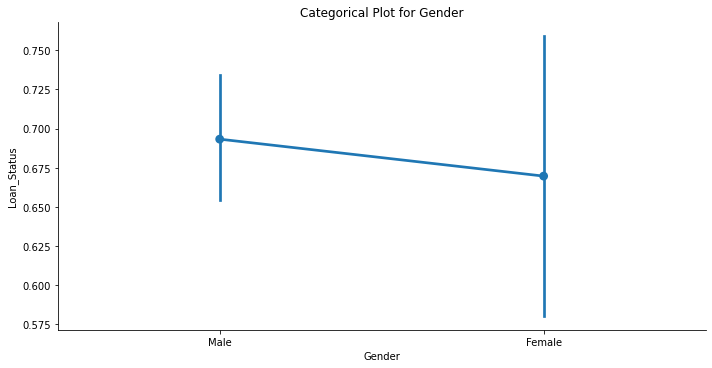

<Figure size 720x360 with 0 Axes>

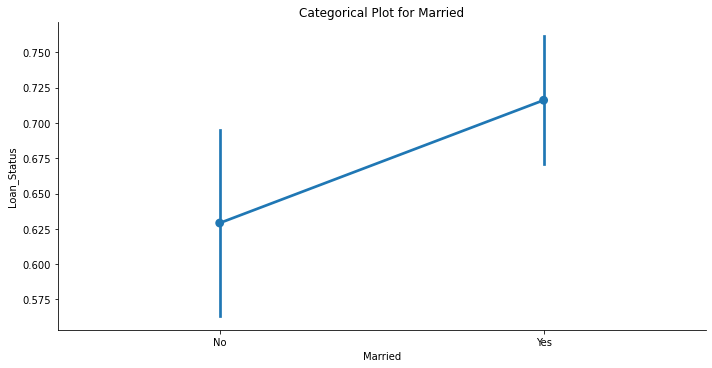

<Figure size 720x360 with 0 Axes>

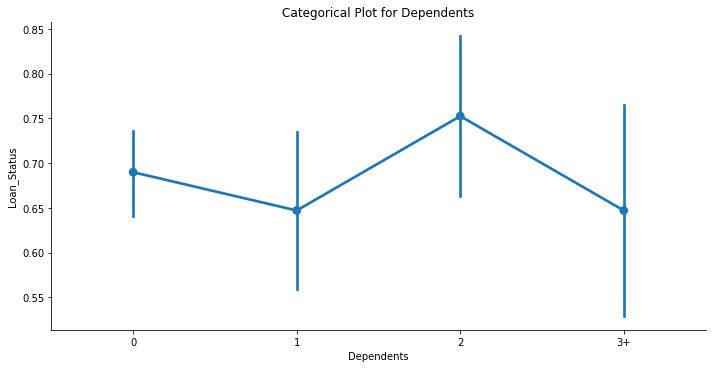

<Figure size 720x360 with 0 Axes>

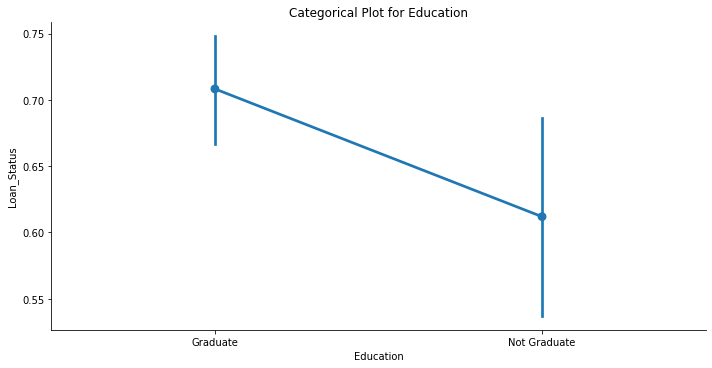

<Figure size 720x360 with 0 Axes>

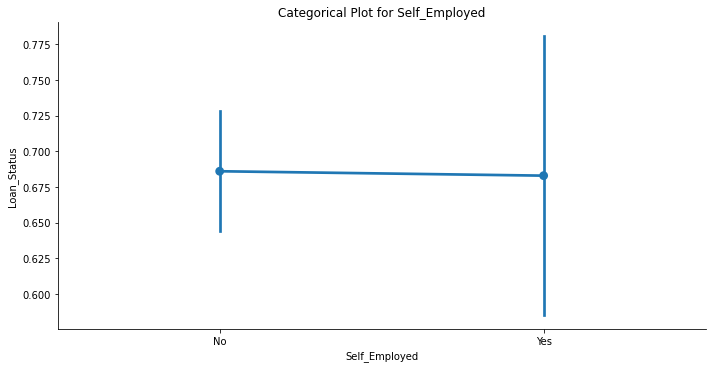

<Figure size 720x360 with 0 Axes>

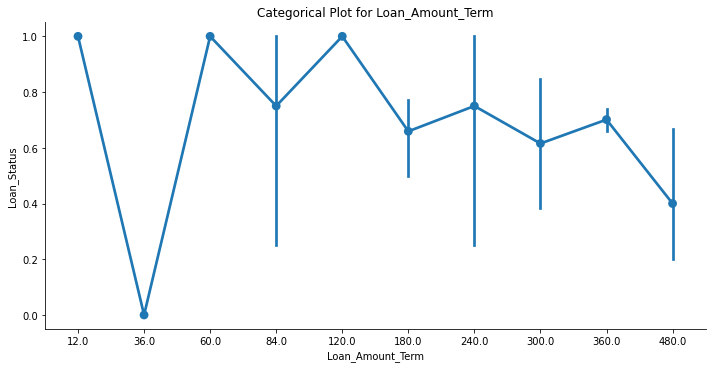

<Figure size 720x360 with 0 Axes>

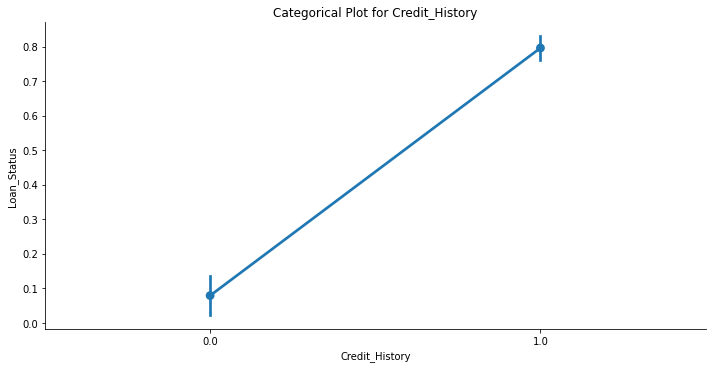

<Figure size 720x360 with 0 Axes>

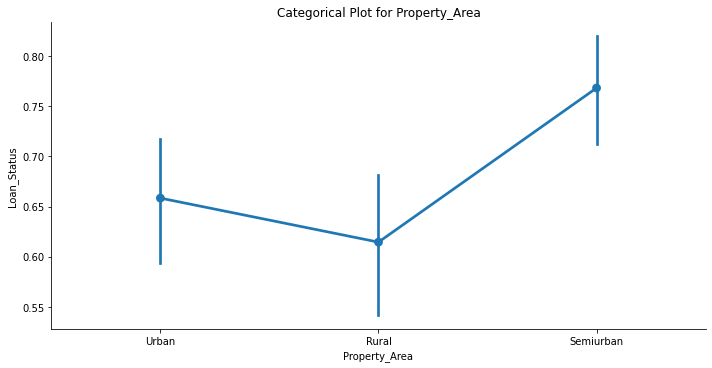

In [2092]:
for feature in cat_features:
  plot_cat_features(loan_dataset_cat,feature)

### Conclusion from exploration of categorical features.
#### 1.) Gender, Married, Dependents, Self_Employed, Loan_Amount_Term and Credit_History has null values.
#### 2.) Loan amount has 10 categories, we can use around 6 categories which are important.
#### 3.) For feature "Self_Employed" the effect on "Loan_Status" is nearly equal.  

## 2.c) Cleaning continuous features

In [2093]:
loan_dataset_cont.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Status
0,5849,0.0,NaN,1
1,4583,1508.0,128.0,0
2,3000,0.0,66.0,1
3,2583,2358.0,120.0,1
4,6000,0.0,141.0,1


In [2094]:
loan_dataset_cont.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Status
0,5849,0.0,NaN,1
1,4583,1508.0,128.0,0
2,3000,0.0,66.0,1
3,2583,2358.0,120.0,1
4,6000,0.0,141.0,1


#### 2.c.1) Removing missing values

In [2095]:
loan_dataset_cont.isnull().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Status           0
dtype: int64

In [2096]:
# Using mean imputation
loan_mean = np.mean(loan_dataset_cont['LoanAmount'])
def mean_imputation(value):
  if np.isnan(value) :
    return loan_mean
  else: 
    return value

In [2097]:
loan_dataset_cont['LoanAmount'] = loan_dataset_cont['LoanAmount'].apply(mean_imputation)

In [2098]:
check_is_gaussian('LoanAmount')

LoanAmount: not Gaussian
0.764670729637146


In [2099]:
loan_dataset_cont.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Status          0
dtype: int64

In [2100]:
loan_dataset_cont.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Status
0,5849,0.0,146.412162,1
1,4583,1508.0,128.000000,0
2,3000,0.0,66.000000,1
3,2583,2358.0,120.000000,1
4,6000,0.0,141.000000,1


#### 2.c.2) Removing skewness in feature

In [2101]:
loan_dataset_cont.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
ApplicantIncome,6.539513,60.540676
CoapplicantIncome,7.491531,84.956384
LoanAmount,2.726601,10.896456
Loan_Status,-0.809998,-1.348306


In [2102]:
features_to_transform = ['ApplicantIncome','CoapplicantIncome','LoanAmount']

In [2103]:
loan_dataset_cont['ApplicantIncome'] = np.log(loan_dataset_cont['ApplicantIncome'])
loan_dataset_cont['CoapplicantIncome'] = np.log(loan_dataset_cont['CoapplicantIncome']+1)
loan_dataset_cont['LoanAmount'] = np.log(loan_dataset_cont['LoanAmount'])

In [2104]:
loan_dataset_cont.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Status
0,8.674026,0.000000,4.986426,1
1,8.430109,7.319202,4.852030,0
2,8.006368,0.000000,4.189655,1
3,7.856707,7.765993,4.787492,1
4,8.699515,0.000000,4.948760,1


C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


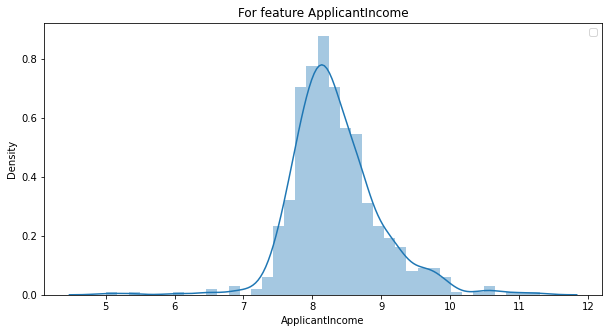

C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


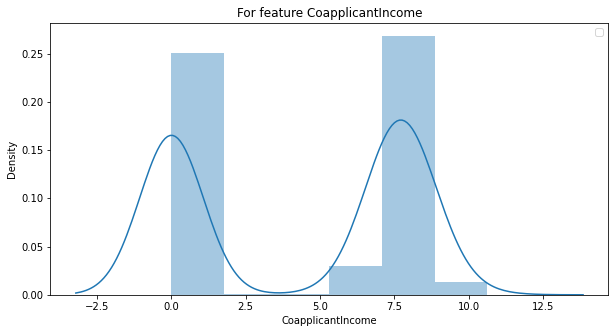

C:\Users\Priyesh Dave\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


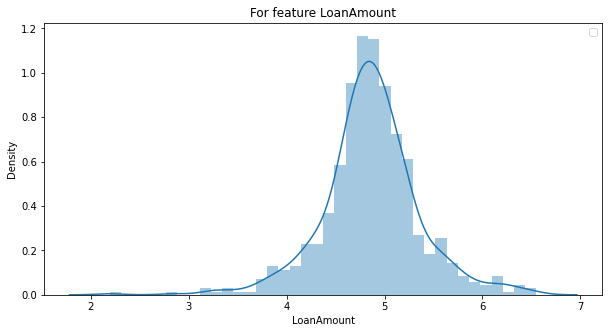

In [2105]:
for feature in cont_features:
  plot_features(loan_dataset_cont ,feature)

In [2106]:
loan_dataset_cont.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
ApplicantIncome,0.479580,3.686875
CoapplicantIncome,-0.173073,-1.911199
LoanAmount,-0.223227,2.799973
Loan_Status,-0.809998,-1.348306


## 2.d) Cleaning Categorical features

### 2.d.1) Cleaning categorical values

In [2107]:
loan_dataset_cat.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,360.0,1.0,Urban,1


In [2108]:
loan_dataset_cat.isnull().sum()

Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
dtype: int64

In [2109]:
loan_dataset_cat['Married'].fillna('Yes',inplace=True)

In [2110]:
loan_dataset_cat['Gender'].fillna('Male',inplace=True)
loan_dataset_cat['Dependents'].fillna('0',inplace=True)

In [2111]:
loan_dataset_cat[np.isnan(loan_dataset_cat['Loan_Amount_Term'])]

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
19,Male,Yes,0,Graduate,NaN,NaN,1.0,Urban,1
36,Male,Yes,0,Graduate,No,NaN,0.0,Urban,0
44,Male,Yes,0,Not Graduate,Yes,NaN,1.0,Urban,1
45,Female,No,0,Graduate,No,NaN,1.0,Urban,1
73,Male,Yes,3+,Not Graduate,No,NaN,0.0,Semiurban,0
112,Male,Yes,0,Not Graduate,No,NaN,0.0,Rural,0
165,Male,Yes,0,Graduate,No,NaN,1.0,Rural,1
197,Female,No,0,Not Graduate,No,NaN,1.0,Urban,1
223,Male,Yes,0,Graduate,No,NaN,1.0,Semiurban,1
232,Male,No,0,Not Graduate,No,NaN,1.0,Rural,1


##### Urban & 1 ==> 360
##### Urban & 0 ==> 360


In [2112]:
loan_dataset_cat[(loan_dataset_cat['Property_Area'] == "Urban") & (loan_dataset_cat['Credit_History']==1)].count()

Gender              151
Married             151
Dependents          151
Education           151
Self_Employed       144
Loan_Amount_Term    147
Credit_History      151
Property_Area       151
Loan_Status         151
dtype: int64

In [2113]:
loan_dataset_cat[(loan_dataset_cat['Property_Area'] == "Urban") & (loan_dataset_cat['Credit_History']==0)].count()

Gender              31
Married             31
Dependents          31
Education           31
Self_Employed       31
Loan_Amount_Term    28
Credit_History      31
Property_Area       31
Loan_Status         31
dtype: int64

In [2114]:
loan_dataset_cat[(loan_dataset_cat['Property_Area'] == "Rural") & (loan_dataset_cat['Credit_History']==1)].count()

Gender              137
Married             137
Dependents          137
Education           137
Self_Employed       127
Loan_Amount_Term    135
Credit_History      137
Property_Area       137
Loan_Status         137
dtype: int64

In [2115]:
loan_dataset_cat[(loan_dataset_cat['Property_Area'] == "Rural") & (loan_dataset_cat['Credit_History']==0)].count()

Gender              28
Married             28
Dependents          28
Education           28
Self_Employed       28
Loan_Amount_Term    26
Credit_History      28
Property_Area       28
Loan_Status         28
dtype: int64

In [2116]:
loan_dataset_cat[(loan_dataset_cat['Property_Area'] == "Semiurban") & (loan_dataset_cat['Credit_History']==1)].count()

Gender              187
Married             187
Dependents          187
Education           187
Self_Employed       179
Loan_Amount_Term    185
Credit_History      187
Property_Area       187
Loan_Status         187
dtype: int64

In [2117]:
loan_dataset_cat[(loan_dataset_cat['Property_Area'] == "Semiurban") & (loan_dataset_cat['Credit_History']==0)].count()

Gender              30
Married             30
Dependents          30
Education           30
Self_Employed       29
Loan_Amount_Term    29
Credit_History      30
Property_Area       30
Loan_Status         30
dtype: int64

In [2118]:
loan_dataset_cat[loan_dataset_cat['Property_Area'] == 'Urban']

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,360.0,1.0,Urban,1
2,Male,Yes,0,Graduate,Yes,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,360.0,1.0,Urban,1
5,Male,Yes,2,Graduate,Yes,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...
600,Female,No,3+,Graduate,NaN,180.0,NaN,Urban,0
602,Male,Yes,3+,Graduate,No,360.0,1.0,Urban,1
605,Male,Yes,0,Not Graduate,No,180.0,1.0,Urban,0
611,Male,Yes,1,Graduate,No,360.0,1.0,Urban,1


In [2119]:
loan_dataset_cat['Loan_Amount_Term'].fillna(360,inplace=True)

In [2120]:
loan_dataset_cat.head(50)

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,360.0,1.0,Urban,1
5,Male,Yes,2,Graduate,Yes,360.0,1.0,Urban,1
6,Male,Yes,0,Not Graduate,No,360.0,1.0,Urban,1
7,Male,Yes,3+,Graduate,No,360.0,0.0,Semiurban,0
8,Male,Yes,2,Graduate,No,360.0,1.0,Urban,1
9,Male,Yes,1,Graduate,No,360.0,1.0,Semiurban,0


In [2121]:
loan_dataset_cat[(loan_dataset_cat['Credit_History'] == 1 ) & (loan_dataset_cat['Loan_Status'] ==1)].count()

Gender              378
Married             378
Dependents          378
Education           378
Self_Employed       356
Loan_Amount_Term    378
Credit_History      378
Property_Area       378
Loan_Status         378
dtype: int64

In [2122]:
loan_dataset_cat[(loan_dataset_cat['Credit_History'] == 0 ) & (loan_dataset_cat['Loan_Status'] == 0)].count()

Gender              82
Married             82
Dependents          82
Education           82
Self_Employed       81
Loan_Amount_Term    82
Credit_History      82
Property_Area       82
Loan_Status         82
dtype: int64

In [2123]:
loan_dataset_cat[(loan_dataset_cat['Credit_History'] == 1 ) & (loan_dataset_cat['Loan_Status'] == 0 )].count()

Gender              97
Married             97
Dependents          97
Education           97
Self_Employed       94
Loan_Amount_Term    97
Credit_History      97
Property_Area       97
Loan_Status         97
dtype: int64

In [2124]:
loan_dataset_cat[(loan_dataset_cat['Credit_History'] == 0 ) & (loan_dataset_cat['Loan_Status'] == 1)].count()

Gender              7
Married             7
Dependents          7
Education           7
Self_Employed       7
Loan_Amount_Term    7
Credit_History      7
Property_Area       7
Loan_Status         7
dtype: int64

In [2125]:
loan_dataset_cat[(loan_dataset_cat['Credit_History'] == 1 ) & (loan_dataset_cat['Loan_Status'] == 0 )].groupby("Property_Area").count()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Loan_Status
Property_Area,,,,,,,,
Rural,39,39,39,39,36,39,39,39
Semiurban,23,23,23,23,23,23,23,23
Urban,35,35,35,35,35,35,35,35


In [2126]:
loan_dataset_cat[(loan_dataset_cat['Credit_History'] == 0 ) & (loan_dataset_cat['Loan_Status'] == 0 )].groupby("Property_Area").count()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Loan_Status
Property_Area,,,,,,,,
Rural,26,26,26,26,26,26,26,26
Semiurban,26,26,26,26,25,26,26,26
Urban,30,30,30,30,30,30,30,30


In [2127]:
loan_dataset_cat[(loan_dataset_cat['Credit_History'] == 1 ) & (loan_dataset_cat['Loan_Status'] == 0 )].groupby(["Property_Area",'Education']).count()

Gender  Married  Dependents  Self_Employed  \
Property_Area Education                                                  
Rural         Graduate          26       26          26             24   
              Not Graduate      13       13          13             12   
Semiurban     Graduate          19       19          19             19   
              Not Graduate       4        4           4              4   
Urban         Graduate          28       28          28             28   
              Not Graduate       7        7           7              7   

                            Loan_Amount_Term  Credit_History  Loan_Status  
Property_Area Education                                                    
Rural         Graduate                    26              26           26  
              Not Graduate                13              13           13  
Semiurban     Graduate                    19              19           19  
              Not Graduate                 4               4            4  
Urban         Graduate                    28              28           28  
              Not Graduate                 7               7            7

In [2128]:
loan_dataset_cat[(loan_dataset_cat['Credit_History'] == 0 ) & (loan_dataset_cat['Loan_Status'] == 0 )].groupby(["Property_Area",'Education']).count()

Gender  Married  Dependents  Self_Employed  \
Property_Area Education                                                  
Rural         Graduate          18       18          18             18   
              Not Graduate       8        8           8              8   
Semiurban     Graduate          21       21          21             20   
              Not Graduate       5        5           5              5   
Urban         Graduate          18       18          18             18   
              Not Graduate      12       12          12             12   

                            Loan_Amount_Term  Credit_History  Loan_Status  
Property_Area Education                                                    
Rural         Graduate                    18              18           18  
              Not Graduate                 8               8            8  
Semiurban     Graduate                    21              21           21  
              Not Graduate                 5               5            5  
Urban         Graduate                    18              18           18  
              Not Graduate                12              12           12

In [2129]:
loan_dataset_cat.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed       32
Loan_Amount_Term     0
Credit_History      50
Property_Area        0
Loan_Status          0
dtype: int64

In [2130]:
def impute_CR_where_loan_is_1(dataset):
  if np.isnan(dataset['Credit_History']):
    if dataset['Loan_Status'] == 1:
      dataset['Credit_History'] = 1
    
  return dataset

In [2131]:
loan_dataset_cat = loan_dataset_cat.apply(impute_CR_where_loan_is_1,axis=1)

In [2132]:
loan_dataset_cat['Credit_History'].fillna(1,inplace=True)

In [2133]:
loan_dataset_cat.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed       32
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [2134]:
loan_dataset_cat.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,360.0,1.0,Urban,1


In [2135]:
features_to_label_encode = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Amount_Term']

In [2136]:
encoder = LabelEncoder()

In [2137]:
def label_encode(feature):
  loan_dataset_cat[feature] = encoder.fit_transform(loan_dataset_cat[feature])

In [2138]:
loan_dataset_cat['Gender'].head(100)

0       Male
1       Male
2       Male
3       Male
4       Male
       ...  
95      Male
96    Female
97      Male
98      Male
99      Male
Name: Gender, Length: 100, dtype: object

In [2139]:
for feature in features_to_label_encode:
  label_encode(feature)

In [2140]:
loan_dataset_cat.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,8,1.0,2,1
1,1,1,1,0,0,8,1.0,0,0
2,1,1,0,0,1,8,1.0,2,1
3,1,1,0,1,0,8,1.0,2,1
4,1,0,0,0,0,8,1.0,2,1


In [2141]:
#loan_dataset_cat.drop('Self_Employed',inplace=True,axis=1)

In [2142]:
loan_dataset_cont.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Status
0,8.674026,0.000000,4.986426,1
1,8.430109,7.319202,4.852030,0
2,8.006368,0.000000,4.189655,1
3,7.856707,7.765993,4.787492,1
4,8.699515,0.000000,4.948760,1


In [2143]:
cleaned_loan_data = pd.concat([loan_dataset_cont.drop('Loan_Status',inplace=True,axis=1), loan_dataset_cat])

In [2144]:
cleaned_loan_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,8,1.0,2,1
1,1,1,1,0,0,8,1.0,0,0
2,1,1,0,0,1,8,1.0,2,1
3,1,1,0,1,0,8,1.0,2,1
4,1,0,0,0,0,8,1.0,2,1


# 3.) Model Preparation

## 3.1) Logistic Regression

In [2145]:
X = cleaned_loan_data.iloc[:,:-1]
y = cleaned_loan_data.iloc[:,-1]

In [2146]:
X

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,8,1.0,2
1,1,1,1,0,0,8,1.0,0
2,1,1,0,0,1,8,1.0,2
3,1,1,0,1,0,8,1.0,2
4,1,0,0,0,0,8,1.0,2
...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,8,1.0,0
610,1,1,3,0,0,5,1.0,0
611,1,1,1,0,0,8,1.0,2
612,1,1,2,0,0,8,1.0,2


In [2147]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [2148]:
cleaned_loan_data['Dependents'].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [2149]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, train_size=.33, random_state=1)

In [2150]:
log_model = buildLogisticRegressionModel(X_train, y_train)

train_predictions = log_model.predict(X_train)
test_predictions = log_model.predict(X_test)

In [2151]:
print('On Train Data')
classification_report(y_train,train_predictions).split('\n')

On Train Data


['              precision    recall  f1-score   support',
 '',
 '           0       0.93      0.42      0.58        62',
 '           1       0.79      0.99      0.88       140',
 '',
 '    accuracy                           0.81       202',
 '   macro avg       0.86      0.70      0.73       202',
 'weighted avg       0.83      0.81      0.79       202',
 '']

In [2152]:
print('On Test Data')
classification_report(y_test,test_predictions).split('\n')

On Test Data


['              precision    recall  f1-score   support',
 '',
 '           0       0.92      0.43      0.59       130',
 '           1       0.79      0.98      0.88       282',
 '',
 '    accuracy                           0.81       412',
 '   macro avg       0.85      0.71      0.73       412',
 'weighted avg       0.83      0.81      0.78       412',
 '']

In [2153]:
print("Train Data: ",metrics.accuracy_score(y_train, train_predictions))
print("Test Data: ",metrics.accuracy_score(y_test, test_predictions))


Train Data:  0.8118811881188119
Test Data:  0.808252427184466


## 3.2) KNN Classification

In [2154]:
from sklearn.neighbors import KNeighborsClassifier

In [2155]:
errors = []

In [2156]:
for k in range(1,50):
  knn_model = KNeighborsClassifier(n_neighbors=k)
  knn_model.fit(X_train,y_train)
  prediction = knn_model.predict(X_test)
  error = np.sum(prediction != y_test).mean()
  errors.append(error)


In [2157]:
errors

[133.0,
 148.0,
 118.0,
 122.0,
 114.0,
 124.0,
 110.0,
 107.0,
 104.0,
 108.0,
 104.0,
 102.0,
 108.0,
 104.0,
 110.0,
 106.0,
 112.0,
 112.0,
 119.0,
 112.0,
 116.0,
 116.0,
 120.0,
 122.0,
 126.0,
 123.0,
 124.0,
 125.0,
 129.0,
 126.0,
 129.0,
 127.0,
 130.0,
 128.0,
 130.0,
 130.0,
 130.0,
 130.0,
 130.0,
 130.0,
 130.0,
 130.0,
 130.0,
 130.0,
 130.0,
 130.0,
 130.0,
 130.0,
 130.0]

<AxesSubplot:>

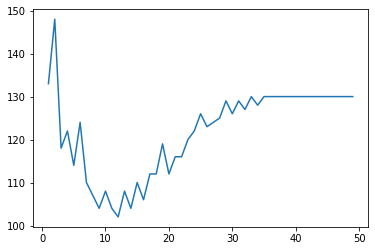

In [2158]:
sns.lineplot(x=range(1,50), y=errors)

In [2165]:
knn_model_opt = KNeighborsClassifier(n_neighbors=12)
knn_model_opt.fit(X_train,y_train)
knn_prediction_train = knn_model_opt.predict(X_train)
knn_predcition_test = knn_model_opt.predict(X_test)

In [2166]:
print("On Train: ",accuracy_score(y_train,knn_prediction_train))
print("On Test: ",accuracy_score(y_test,knn_predcition_test))

On Train:  0.7673267326732673
On Test:  0.7524271844660194
